In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

In [3]:
print(tf.__version__)

2.17.0


# MNIST 학습데이터 준비

In [4]:
# MNIST
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


# 인공신경망(Artificial Neural Network, ANN)

## MNIST


### 신경망 학습을 위한 학습데이터 정규화

In [5]:
# 학습 데이터 정규화
x_trainF = x_train.reshape(60000,784)   # 1차원 구조로 변경
x_testF = x_test.reshape(10000,784)

x_trainF = x_trainF.astype('float32')   # 0~1로 정규화하기 위해 실수형으로 변환
x_testF = x_testF.astype('float32')

x_trainF /= 255.0                       # 0~1로 정규화
x_testF /= 255.0

x_trainF.shape, x_testF.shape

((60000, 784), (10000, 784))

In [6]:
y_train10=tf.keras.utils.to_categorical(y_train,10)   # one-hot 인코딩
y_test10=tf.keras.utils.to_categorical(y_test,10)

y_train10.shape, y_test10.shape

((60000, 10), (10000, 10))

### 신경망 학습

In [7]:
# 학습 모델 : 신경망
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense   # Fully connected

mlp_model = Sequential()
mlp_model.add(Dense(128, activation=tf.nn.tanh, input_shape = (784,)))# Input layer     # input_shape = (784,): 입력층과 가장 가까운 층
mlp_model.add(Dense(10, activation=tf.nn.softmax)) # adding an output layer (with 10 possible outputs for the 10 digits we need to predict)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 학습
from tensorflow.keras.optimizers import SGD

mlp_model.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])  # 학습 모델 설정
history=mlp_model.fit(x_trainF, y_train10, batch_size=128, epochs=50, validation_data=(x_testF,y_test10), verbose=2)    # history에 학습 과정을 받을 수 있음. Epoch: 반복 횟수. verbose=2: 모든 Epoch를 출력

Epoch 1/50
469/469 - 4s - 8ms/step - accuracy: 0.2424 - loss: 0.0880 - val_accuracy: 0.3428 - val_loss: 0.0853
Epoch 2/50
469/469 - 1s - 2ms/step - accuracy: 0.4065 - loss: 0.0826 - val_accuracy: 0.4527 - val_loss: 0.0797
Epoch 3/50
469/469 - 1s - 3ms/step - accuracy: 0.4852 - loss: 0.0769 - val_accuracy: 0.5124 - val_loss: 0.0738
Epoch 4/50
469/469 - 2s - 3ms/step - accuracy: 0.5331 - loss: 0.0711 - val_accuracy: 0.5523 - val_loss: 0.0683
Epoch 5/50
469/469 - 1s - 2ms/step - accuracy: 0.5707 - loss: 0.0660 - val_accuracy: 0.5909 - val_loss: 0.0634
Epoch 6/50
469/469 - 1s - 2ms/step - accuracy: 0.6061 - loss: 0.0615 - val_accuracy: 0.6232 - val_loss: 0.0593
Epoch 7/50
469/469 - 1s - 3ms/step - accuracy: 0.6348 - loss: 0.0577 - val_accuracy: 0.6499 - val_loss: 0.0557
Epoch 8/50
469/469 - 1s - 3ms/step - accuracy: 0.6581 - loss: 0.0545 - val_accuracy: 0.6695 - val_loss: 0.0527
Epoch 9/50
469/469 - 1s - 2ms/step - accuracy: 0.6748 - loss: 0.0517 - val_accuracy: 0.6851 - val_loss: 0.0500
E

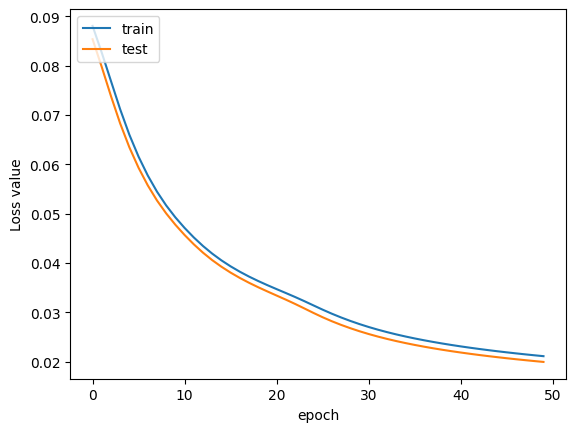

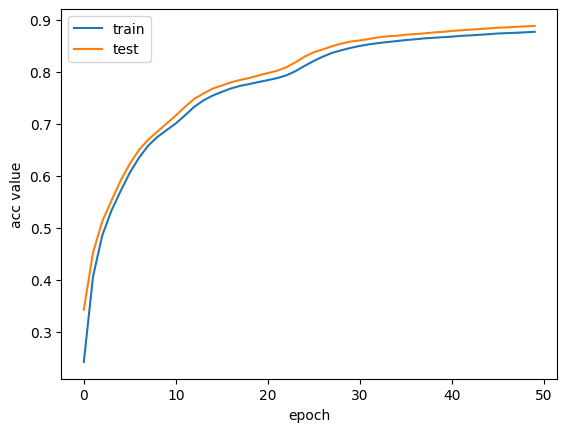

In [9]:
# plot loss and acc
plt.plot(history.history['loss'])   # 실패율
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])   # 정확도
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
# 평가
mlp_acc=mlp_model.evaluate(x_testF,y_test10,verbose=0)
print('정확도 = ',mlp_acc[1]*100)

정확도 =  88.80000114440918


In [11]:
# 예측
mlp_model.predict(x_testF[0].reshape(1, 784))   # 출력노드 10개의 값 모두 출력

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


array([[1.5179728e-03, 9.9176483e-05, 6.2097993e-04, 3.5727958e-03,
        4.8738791e-04, 1.9692127e-03, 1.8756476e-04, 9.7515798e-01,
        9.6290850e-04, 1.5424170e-02]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


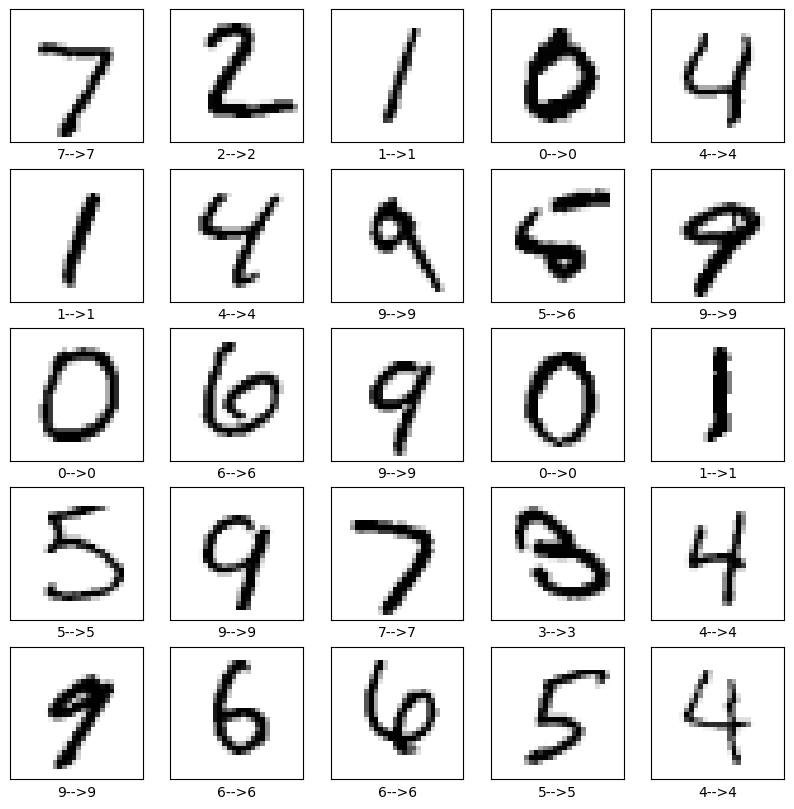

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_test[i]) + '-->' + str(np.argmax(mlp_model.predict(x_testF[i].reshape(1, 784)))))  # 실제값 --> 출력노드 중 가장 큰 값
plt.show()

In [13]:
# 저장
mlp_model.save('mlp_trained.keras') #.h5')  # 모든 연결의 가중치 저장. 코랩에서 로컬로 다운로드할 것.

# 딥러닝 : CNN

## LeNet5 - MNIST

### CNN 학습을 위한 학습데이터

In [ ]:
# 2차원 구조(vs. mlp)
x_trainC=x_train.astype(np.float32)/255.0  # 0~1로 정규화
x_testC=x_test.astype(np.float32)/255.0

print(x_trainC.shape,x_testC.shape)

### CNN 학습

In [ ]:
# 학습 모델 : LeNet5
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense
from keras.optimizers import Adam

cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Conv2D(16,(5,5),padding='valid',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Conv2D(120,(5,5),padding='valid',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(units=84,activation='relu'))
cnn.add(Dense(units=10,activation='softmax'))

In [ ]:
cnn.summary()

In [ ]:
# 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
cnn.fit(x_trainC,y_train10,batch_size=128,epochs=50,validation_data=(x_testC,y_test10),verbose=2)

In [ ]:
# 평가
cnn_acc=cnn.evaluate(x_testC,y_test10,verbose=0)
print('정확률=',cnn_acc[1]*100)

In [ ]:
# 예측
cnn.predict(x_testC[0].reshape(1, 28,28,1))

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_test[i]) + '-->' + str(np.argmax(cnn.predict(x_testC[i].reshape(1,28,28,1)))))
plt.show()

In [ ]:
cnn.save('lenet_trained.keras') #.h5')

### 가중치 시각화

In [ ]:
# 세번째 layer의 가중치 불러오기
filters , bias = cnn.layers[2].get_weights()
print(filters.shape)

# 0-1 정규화
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

f = filters[:,:,:,0]
fig = plt.figure(figsize=(2,2))
plt.imshow(f[:,:,0],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
n_filters, ix =4, 1
fig = plt.figure(figsize=(8,8))
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(4):
        plt.subplot(n_filters,4,ix)
        plt.imshow(f[:,:,j], cmap='gray')
        ix+=1
plt.show()